# Machine Learning Group Project: Titanic Survival Prediction

**Course**: Data Science Fundamentals  
**Institution**: LUCT  
**Academic Year**: 2024/2025  
**Semester**: Year 3, Semester 1

---

## Table of Contents
1. [Introduction](#1-introduction)
2. [Data Collection and Preprocessing](#2-data-collection-and-preprocessing)
3. [Supervised Learning](#3-supervised-learning)
4. [Unsupervised Learning](#4-unsupervised-learning)
5. [Insights and Conclusions](#5-insights-and-conclusions)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
import sys
sys.path.append('../src')

from preprocessing import *
from supervised import *
from unsupervised import *
from visualization import *

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 1. Introduction

### 1.1 Dataset Overview

The **Titanic dataset** is one of the most famous datasets in machine learning. It contains information about passengers aboard the RMS Titanic, which sank on April 15, 1912, after colliding with an iceberg during its maiden voyage.

**Source**: [Kaggle - Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

**Context**: The sinking of the Titanic is one of the most infamous shipwrecks in history. While there was some element of luck involved in surviving, it appears that some groups of people were more likely to survive than others.

### 1.2 Project Objectives

1. **Preprocess the data**: Handle missing values, outliers, and perform feature engineering
2. **Exploratory Data Analysis**: Understand patterns and relationships in the data
3. **Supervised Learning**: Build classification models to predict passenger survival
4. **Unsupervised Learning**: Discover passenger segments through clustering
5. **Extract Insights**: Identify factors that influenced survival rates

### 1.3 Dataset Features

- **PassengerId**: Unique identifier for each passenger
- **Survived**: Survival status (0 = No, 1 = Yes) - **TARGET VARIABLE**
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name**: Passenger name
- **Sex**: Gender (male/female)
- **Age**: Age in years
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## 2. Data Collection and Preprocessing

### 2.1 Load Dataset

In [2]:
# Download dataset if not present
from download_data import download_titanic_dataset
dataset_path = download_titanic_dataset()

# Load the dataset
df = load_data(dataset_path)
df.head(10)

✓ Dataset already exists at data/raw\titanic.csv
✓ Dataset loaded successfully: 891 rows, 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 2.2 Initial Data Exploration

In [3]:
# Explore dataset structure
exploration = explore_data(df)


DATASET EXPLORATION

Shape: 891 rows × 12 columns

Duplicate rows: 0

------------------------------------------------------------
MISSING VALUES
------------------------------------------------------------
  Column  Missing Count  Percentage
     Age            177       19.87
   Cabin            687       77.10
Embarked              2        0.22


In [4]:
# Display data types
print("\nData Types:")
print(exploration['dtypes'])


Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# Statistical summary for numerical features
print("\nNumerical Features Summary:")
exploration['numerical_summary']


Numerical Features Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Statistical summary for categorical features
print("\nCategorical Features Summary:")
exploration['categorical_summary']


Categorical Features Summary:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


### 2.3 Exploratory Data Analysis (EDA)

#### 2.3.1 Missing Values Analysis

✓ Missing values plot saved to ../outputs/figures/missing_values.png


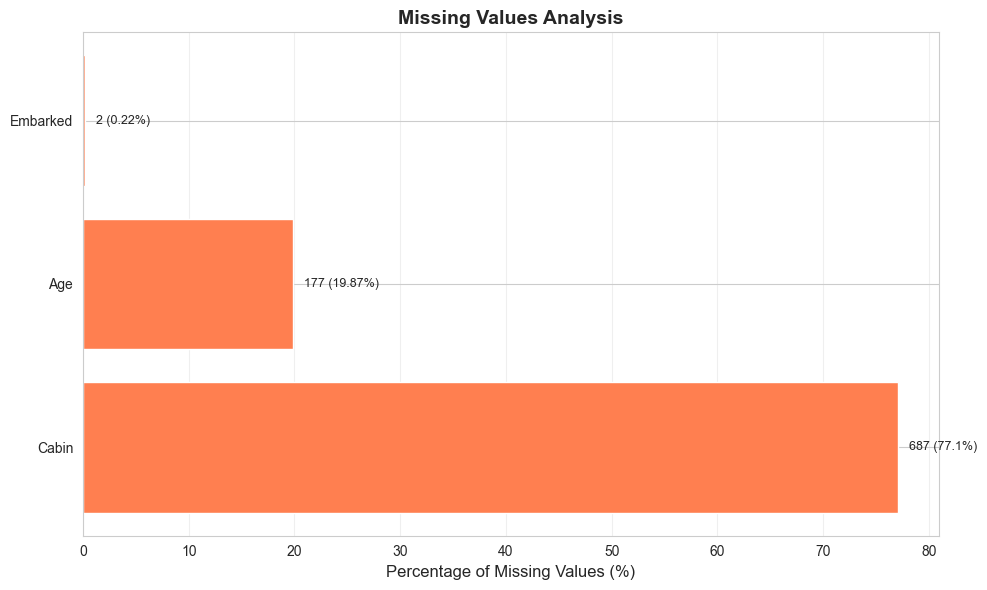

In [7]:
# Visualize missing values
plot_missing_values(df, save_path='../outputs/figures/missing_values.png')

#### 2.3.2 Target Variable Distribution

✓ Target distribution plot saved to ../outputs/figures/target_distribution.png


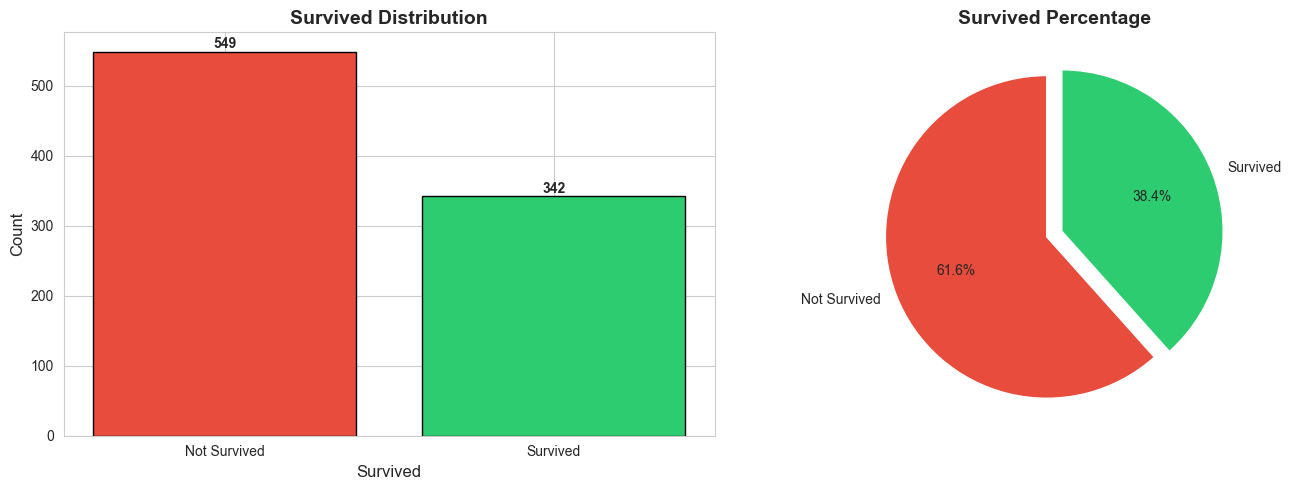

In [8]:
# Plot target distribution
plot_target_distribution(df, target_col='Survived', save_path='../outputs/figures/target_distribution.png')

#### 2.3.3 Numerical Features Distribution

✓ Numerical distributions plot saved to ../outputs/figures/numerical_distributions.png


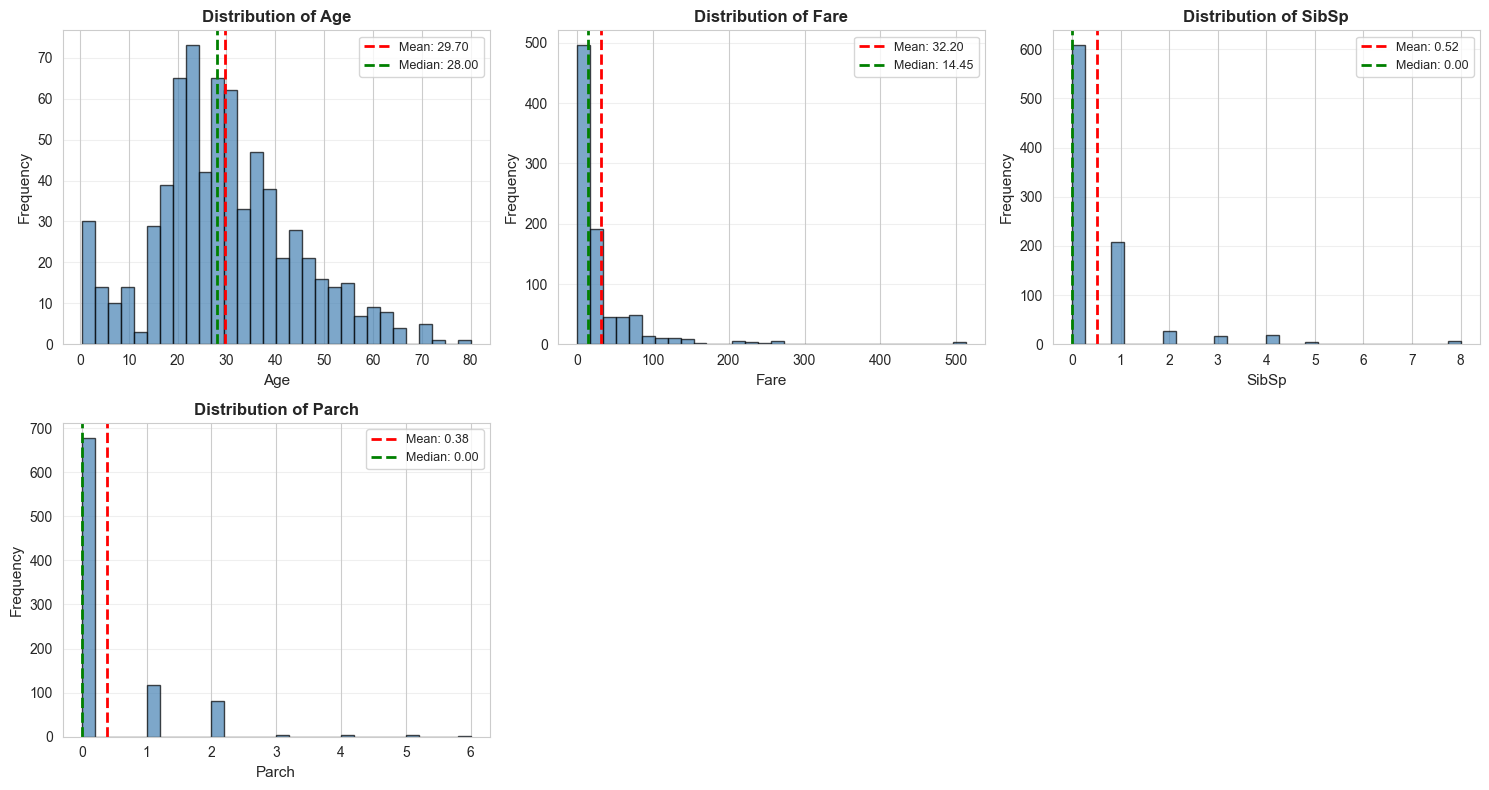

In [9]:
# Plot numerical distributions
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plot_numerical_distributions(df, numerical_cols, save_path='../outputs/figures/numerical_distributions.png')

#### 2.3.4 Categorical Features Distribution

✓ Categorical distributions plot saved to ../outputs/figures/categorical_distributions.png


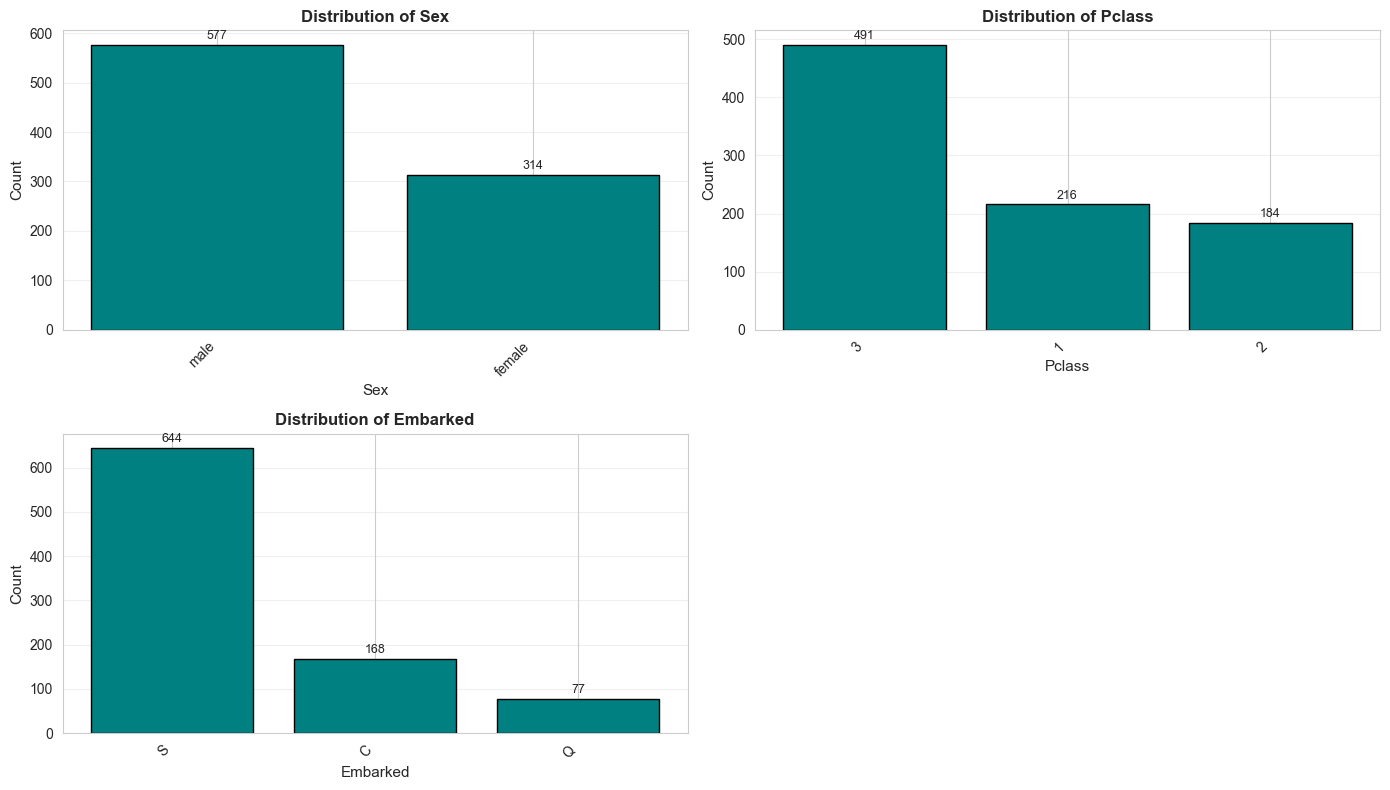

In [10]:
# Plot categorical distributions
categorical_cols = ['Sex', 'Pclass', 'Embarked']
plot_categorical_distributions(df, categorical_cols, save_path='../outputs/figures/categorical_distributions.png')

#### 2.3.5 Correlation Analysis

✓ Correlation matrix saved to ../outputs/figures/correlation_matrix.png


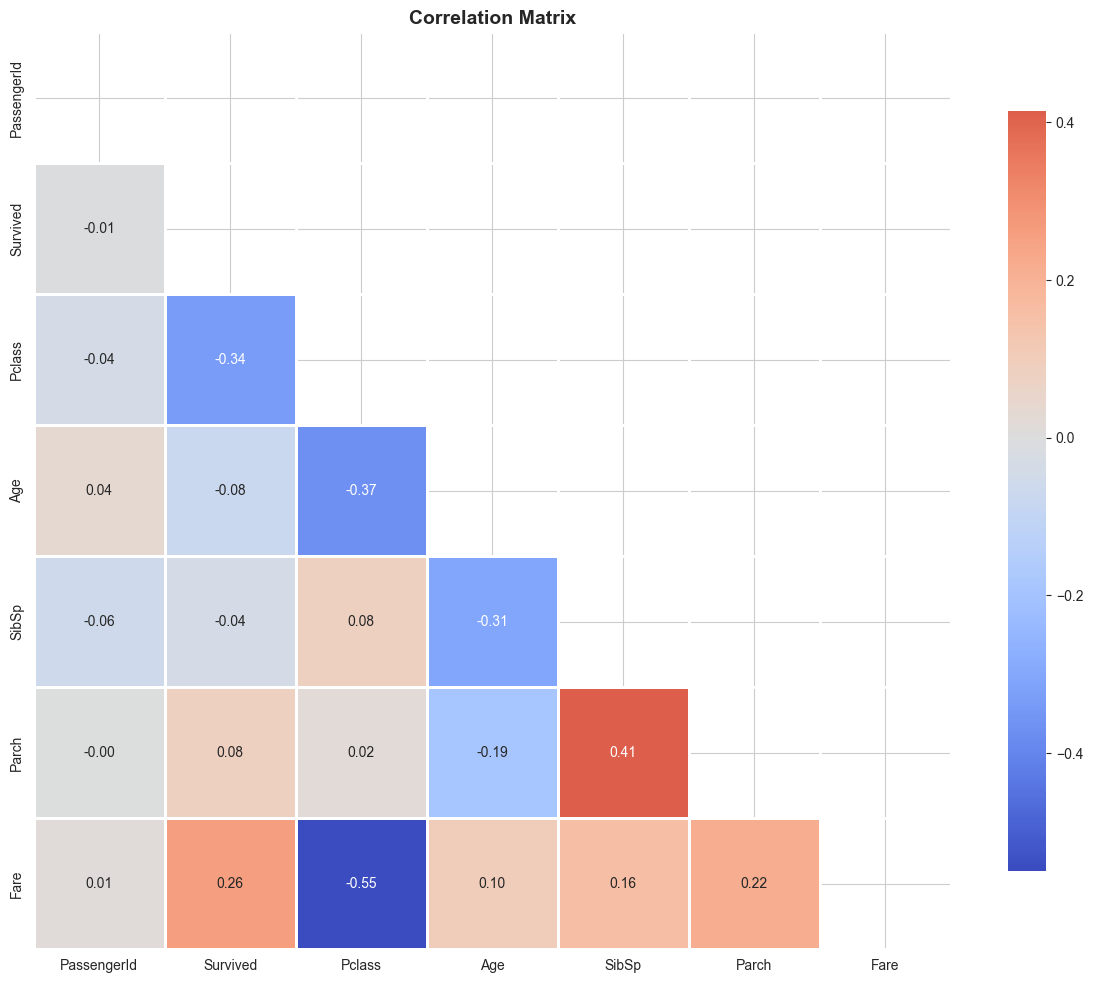

In [11]:
# Create correlation matrix
plot_correlation_matrix(df, save_path='../outputs/figures/correlation_matrix.png')

#### 2.3.6 Feature vs Target Analysis

✓ Feature vs target plot saved to ../outputs/figures/sex_vs_survival.png


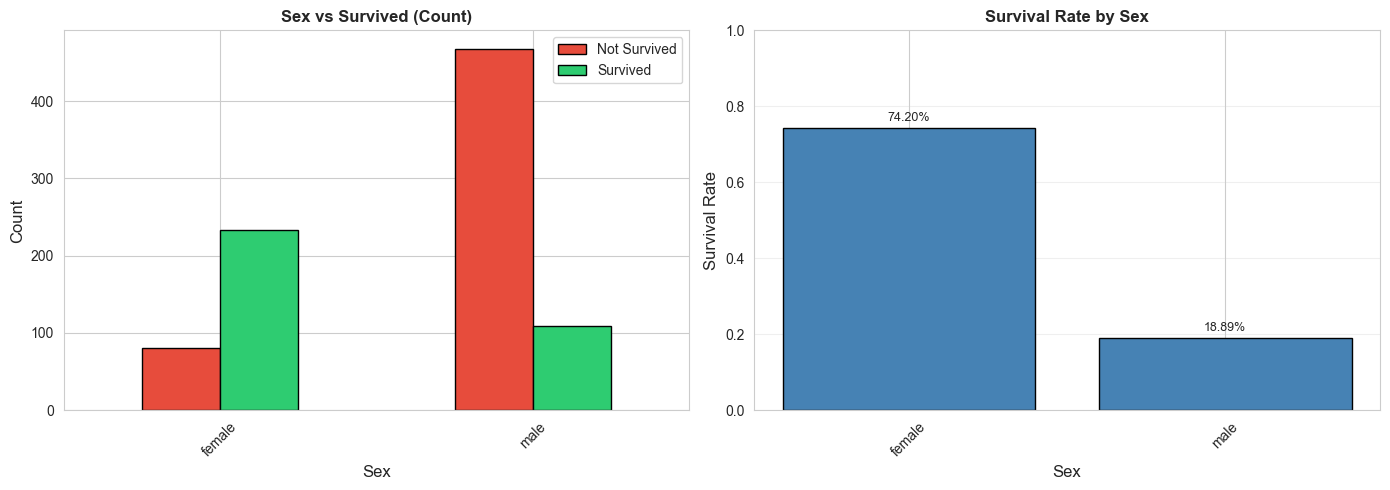

In [12]:
# Analyze Sex vs Survival
plot_feature_vs_target(df, 'Sex', target_col='Survived', save_path='../outputs/figures/sex_vs_survival.png')

✓ Feature vs target plot saved to ../outputs/figures/pclass_vs_survival.png


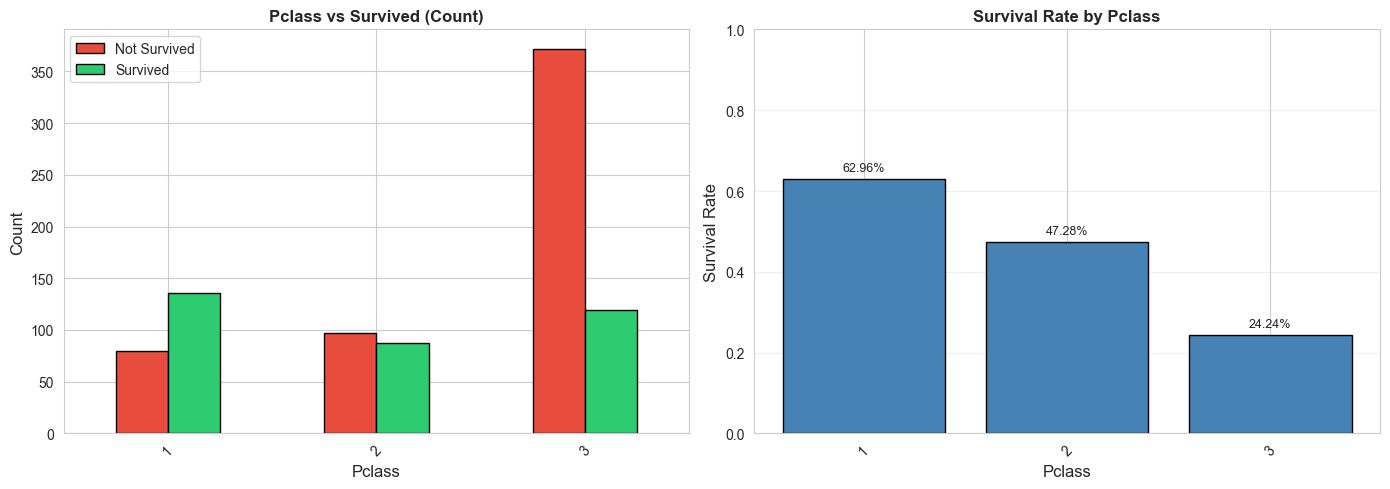

In [13]:
# Analyze Pclass vs Survival
plot_feature_vs_target(df, 'Pclass', target_col='Survived', save_path='../outputs/figures/pclass_vs_survival.png')

✓ Feature vs target plot saved to ../outputs/figures/age_vs_survival.png


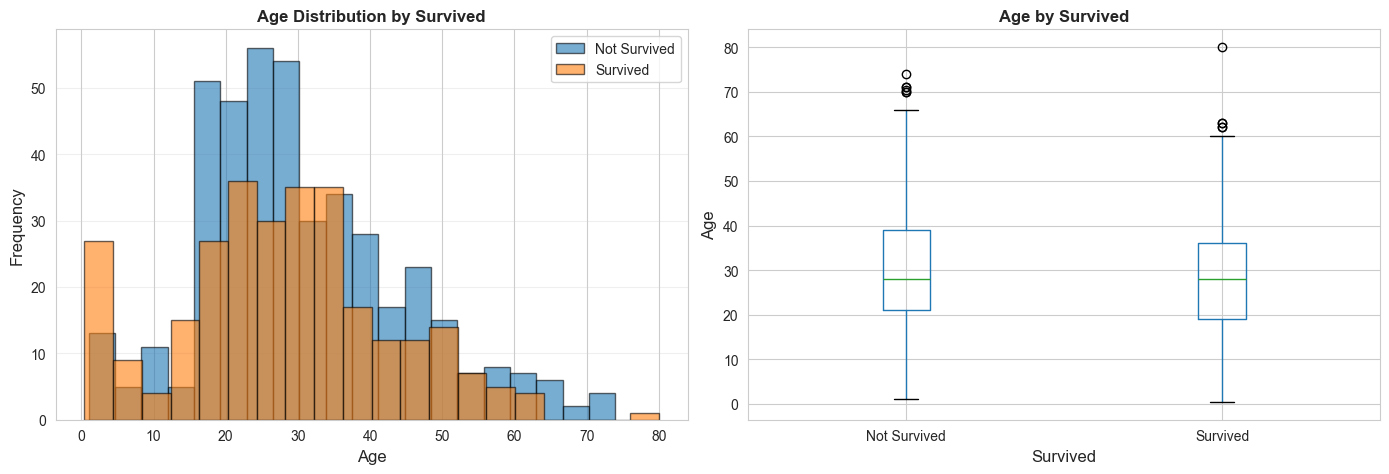

In [14]:
# Analyze Age vs Survival
plot_feature_vs_target(df, 'Age', target_col='Survived', save_path='../outputs/figures/age_vs_survival.png')

#### 2.3.7 Outlier Detection

In [15]:
# Detect outliers
outliers = detect_outliers(df, ['Age', 'Fare'])


------------------------------------------------------------
OUTLIER DETECTION (IQR Method)
------------------------------------------------------------
Age: 11 outliers (1.23%)
Fare: 116 outliers (13.02%)


✓ Boxplots saved to ../outputs/figures/boxplots.png


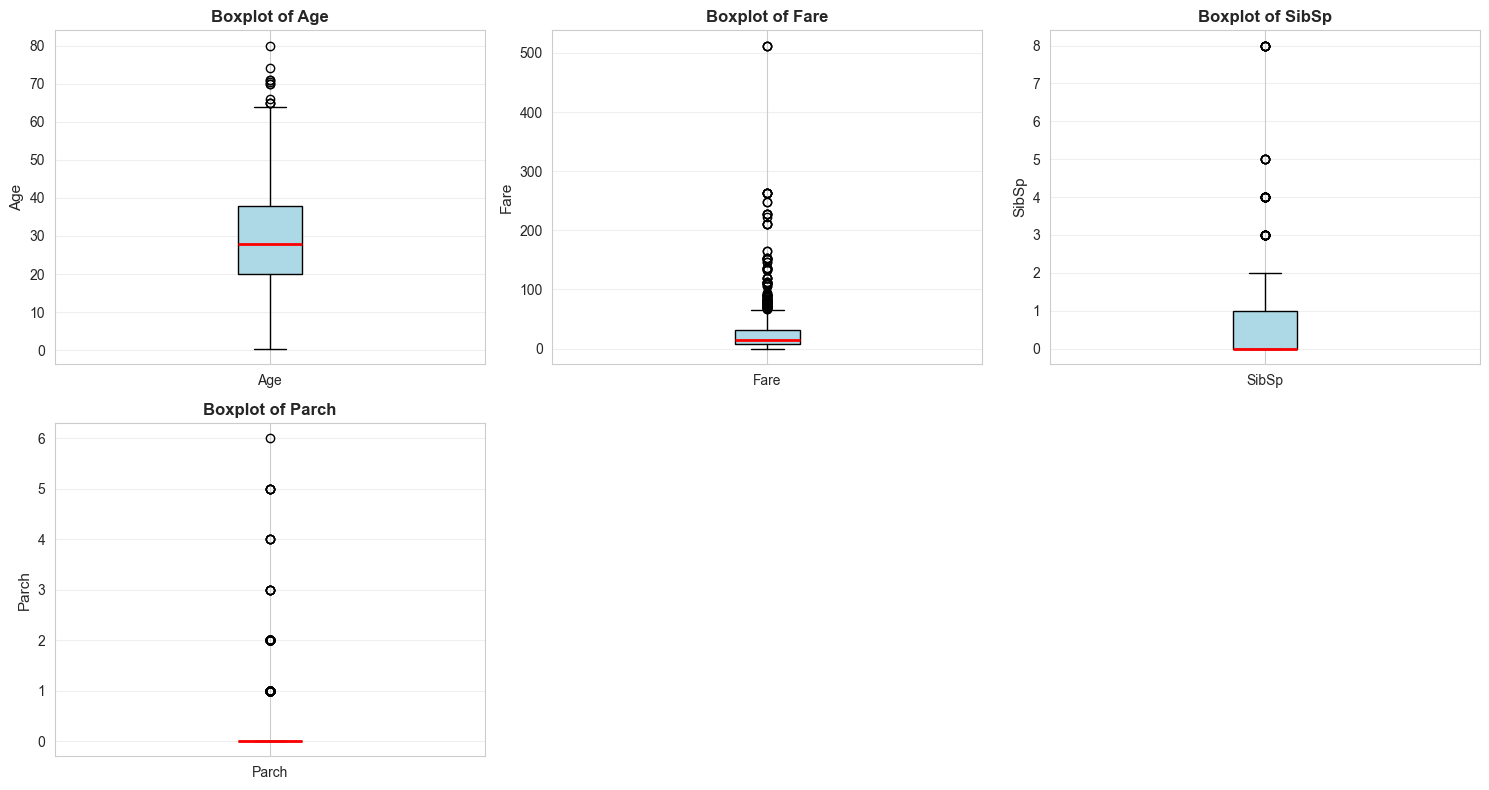

In [16]:
# Plot boxplots for outlier visualization
plot_boxplots(df, ['Age', 'Fare', 'SibSp', 'Parch'], save_path='../outputs/figures/boxplots.png')

### 2.4 Data Cleaning

#### 2.4.1 Handle Missing Values

In [17]:
# Handle missing values
df_clean = handle_missing_values(df)

# Verify no missing values remain in critical columns
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())


✓ Missing values handled successfully

Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_Known      0
dtype: int64


#### 2.4.2 Feature Engineering

In [18]:
# Create new features
df_engineered = feature_engineering(df_clean)

# Display new features
print("\nNew columns:")
new_cols = set(df_engineered.columns) - set(df.columns)
print(list(new_cols))

df_engineered.head()


✓ Feature engineering completed
  New features: FamilySize, IsAlone, Title, AgeGroup, FarePerPerson, Cabin_Known

New columns:
['FamilySize', 'Cabin_Known', 'FarePerPerson', 'IsAlone', 'Title', 'AgeGroup']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known,FamilySize,IsAlone,Title,AgeGroup,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0,Mr,Adult,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0,Mrs,Middle,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,Miss,Adult,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0,Mrs,Adult,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1,Mr,Adult,8.05000


#### 2.4.3 Encode Categorical Variables

In [19]:
# Encode categorical variables
df_encoded = encode_categorical(df_engineered, target_col='Survived')

print("\nShape after encoding:", df_encoded.shape)
df_encoded.head()


✓ Categorical variables encoded

Shape after encoding: (891, 25)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Cabin_Known,FamilySize,IsAlone,FarePerPerson,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,3.62500,False,True,False,True,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,35.64165,False,False,False,False,True,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,7.92500,False,True,True,False,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,2,0,26.55000,False,True,False,False,True,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,8.05000,False,True,False,True,False,False,False,True,False,False


### 2.5 Prepare Data for Modeling

In [20]:
# Prepare features and target
X, y = prepare_features(df_encoded, target_col='Survived')

print("\nFeature names:")
print(X.columns.tolist())


✓ Features prepared: 20 features, 891 samples

Feature names:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Known', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_Middle', 'AgeGroup_Senior']


In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)


✓ Data split completed:
  Training set: 712 samples
  Testing set: 179 samples


In [22]:
# Scale features
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)


✓ Features scaled: 10 numerical columns


In [23]:
# Save processed data
save_processed_data(df_encoded, '../data/processed/titanic_processed.csv')


✓ Processed data saved to: ../data/processed/titanic_processed.csv


## 3. Supervised Learning

### 3.1 Initialize Models

In [24]:
# Create supervised models object
supervised = SupervisedModels()

# Initialize multiple models
models = supervised.initialize_models()

✓ Initialized 7 models


### 3.2 Train Models

In [25]:
# Train all models
supervised.train_all_models(X_train_scaled, y_train)


TRAINING MODELS
✓ Logistic Regression trained successfully
✓ Decision Tree trained successfully
✓ Random Forest trained successfully
✓ K-Nearest Neighbors trained successfully
✓ Support Vector Machine trained successfully
✓ Naive Bayes trained successfully
✓ Gradient Boosting trained successfully

✓ All 7 models trained


### 3.3 Evaluate Models

In [26]:
# Evaluate all models
results_df = supervised.evaluate_all_models(X_test_scaled, y_test)
results_df


EVALUATING MODELS

------------------------------------------------------------
MODEL PERFORMANCE COMPARISON
------------------------------------------------------------
                 Model  Accuracy  Precision   Recall  F1 Score  ROC AUC
Support Vector Machine  0.826816   0.806452 0.724638  0.763359 0.855863
   Logistic Regression  0.821229   0.784615 0.739130  0.761194 0.868379
         Decision Tree  0.798883   0.732394 0.753623  0.742857 0.781159
   K-Nearest Neighbors  0.798883   0.761905 0.695652  0.727273 0.850132
     Gradient Boosting  0.793296   0.766667 0.666667  0.713178 0.837220
         Random Forest  0.787709   0.724638 0.724638  0.724638 0.818709
           Naive Bayes  0.776536   0.716418 0.695652  0.705882 0.821739

✓ Best Model: Support Vector Machine
  Accuracy: 0.8268


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
4,Support Vector Machine,0.826816,0.806452,0.724638,0.763359,0.855863
0,Logistic Regression,0.821229,0.784615,0.739130,0.761194,0.868379
1,Decision Tree,0.798883,0.732394,0.753623,0.742857,0.781159
3,K-Nearest Neighbors,0.798883,0.761905,0.695652,0.727273,0.850132
6,Gradient Boosting,0.793296,0.766667,0.666667,0.713178,0.837220
2,Random Forest,0.787709,0.724638,0.724638,0.724638,0.818709
5,Naive Bayes,0.776536,0.716418,0.695652,0.705882,0.821739


### 3.4 Model Comparison Visualization

✓ Model comparison plot saved to ../outputs/figures/model_comparison.png


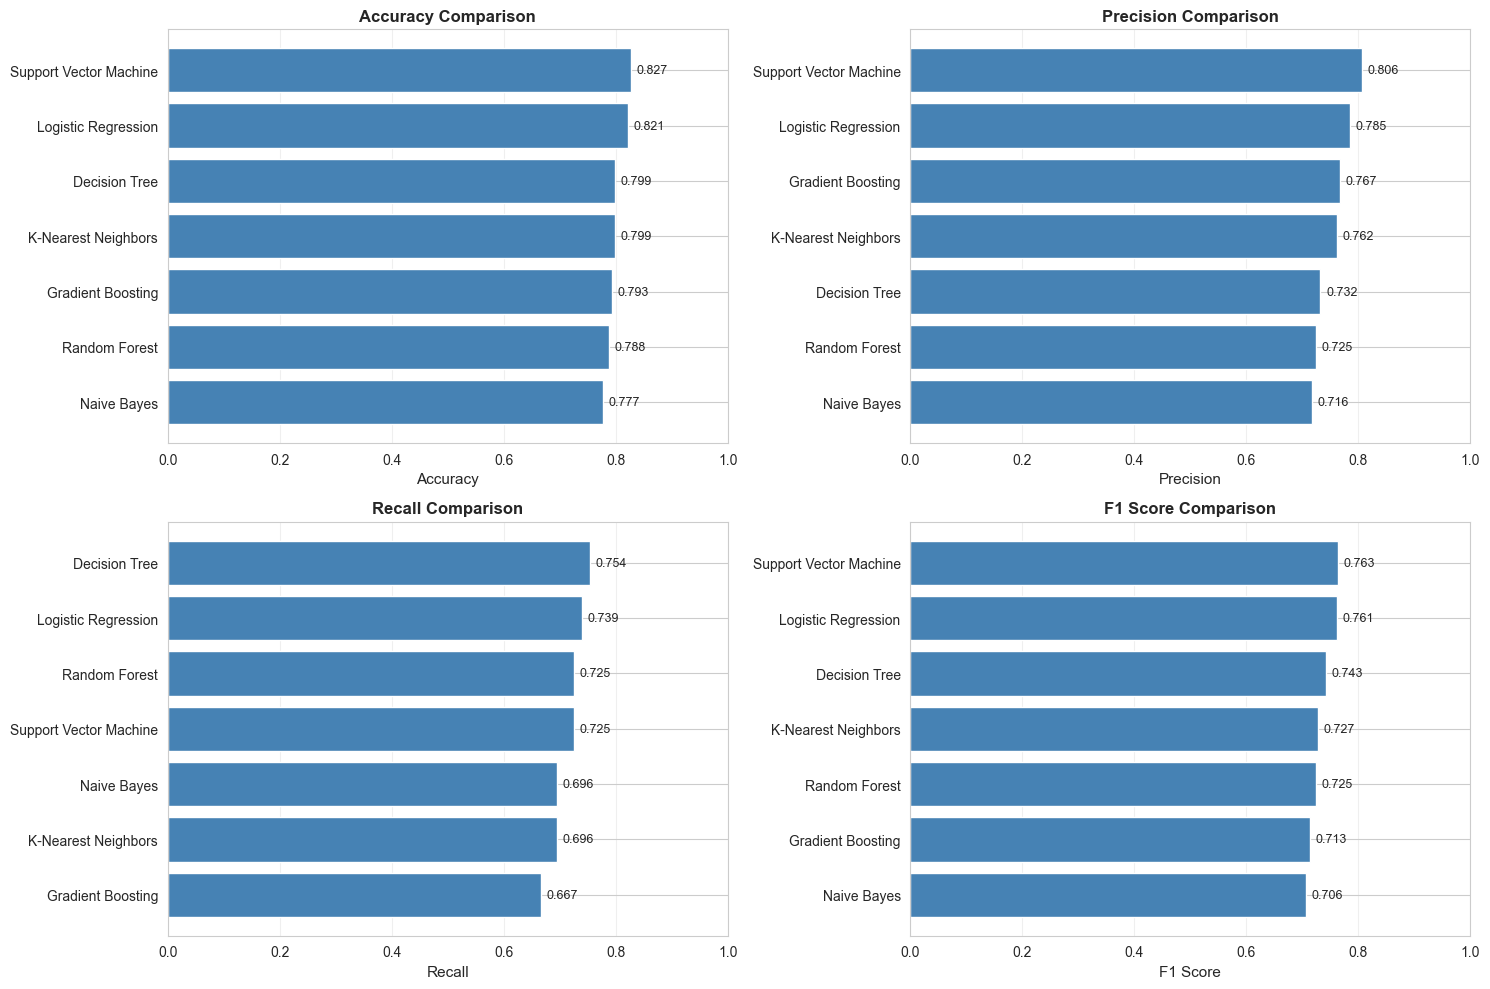

In [47]:
# Plot model comparison
plot_model_comparison(results_df, save_path='../outputs/figures/model_comparison.png')

### 3.5 Best Model Analysis

Best Model: Support Vector Machine
✓ Confusion matrix saved to ../outputs/figures/confusion_matrix_best.png


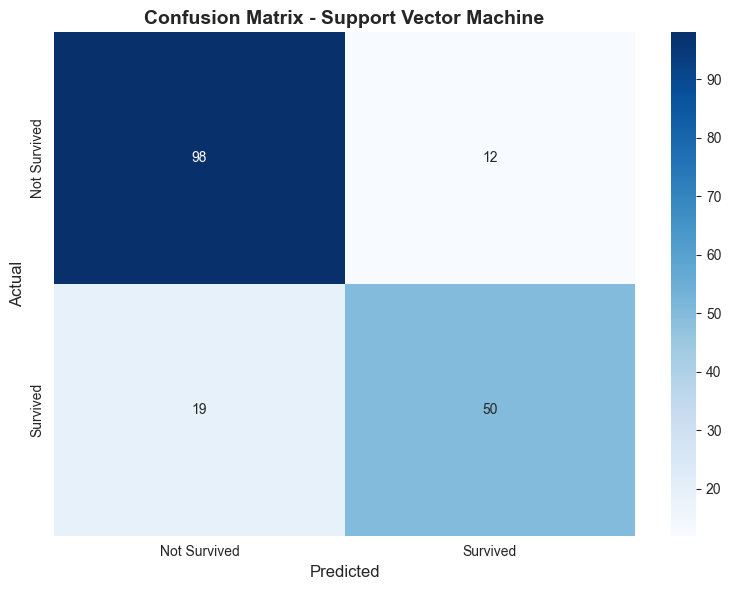

In [48]:
# Get best model name
best_model_name = supervised.best_model_name
print(f"Best Model: {best_model_name}")

# Get confusion matrix for best model
cm = supervised.results[best_model_name]['confusion_matrix']
plot_confusion_matrix(cm, best_model_name, save_path='../outputs/figures/confusion_matrix_best.png')

✓ ROC curve saved to ../outputs/figures/roc_curve_best.png


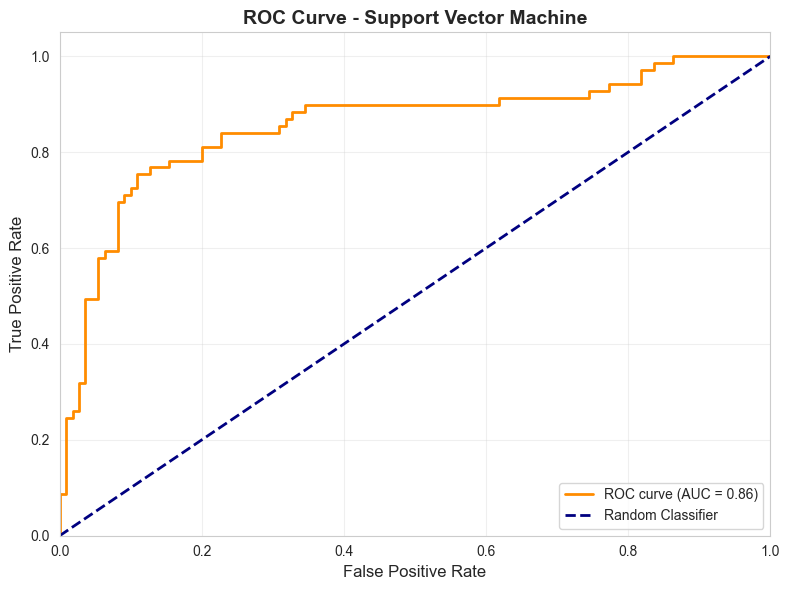

In [29]:
# Plot ROC curve for best model
if supervised.results[best_model_name]['probabilities'] is not None:
    plot_roc_curve(y_test, supervised.results[best_model_name]['probabilities'], 
                   best_model_name, save_path='../outputs/figures/roc_curve_best.png')

### 3.6 Feature Importance


Top 10 Most Important Features:
          Feature  Importance
2             Age    0.159766
5            Fare    0.150294
9   FarePerPerson    0.141162
13       Title_Mr    0.126014
1             Sex    0.105300
0          Pclass    0.047063
6     Cabin_Known    0.045743
7      FamilySize    0.038849
12     Title_Miss    0.031972
14      Title_Mrs    0.031577


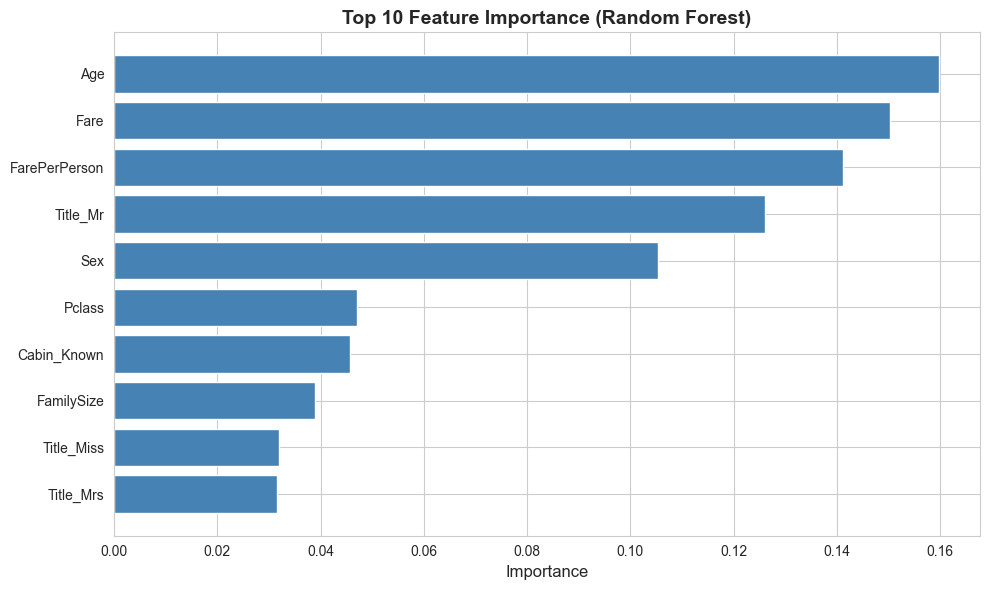

In [49]:
# Get feature importance for Random Forest
importance_df = supervised.get_feature_importance('Random Forest', X_train.columns)

if importance_df is not None:
    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df.head(10)['Feature'], importance_df.head(10)['Importance'], color='steelblue')
    plt.xlabel('Importance', fontsize=12)
    plt.title('Top 10 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../outputs/figures/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

### 3.7 Cross-Validation

In [31]:
# Perform cross-validation on best model
cv_results = supervised.cross_validate(best_model_name, X_train_scaled, y_train, cv=5)


Support Vector Machine - Cross-Validation Results (5-fold):
  Scores: [0.78321678 0.8041958  0.83802817 0.83098592 0.83098592]
  Mean Accuracy: 0.8175 (+/- 0.0207)


### 3.8 Save Best Model

In [32]:
# Save the best model
supervised.save_model(best_model_name, f'../outputs/models/{best_model_name.lower().replace(" ", "_")}.pkl')

✓ Support Vector Machine saved to ../outputs/models/support_vector_machine.pkl


## 4. Unsupervised Learning

### 4.1 Prepare Data for Clustering

In [33]:
# Use scaled features for clustering (without target variable)
X_clustering = X_train_scaled.copy()

print(f"Data shape for clustering: {X_clustering.shape}")

Data shape for clustering: (712, 20)


### 4.2 Dimensionality Reduction with PCA

#### 4.2.1 Apply PCA

In [50]:
# Create unsupervised models object
unsupervised = UnsupervisedModels()

# Apply PCA
pca_results = unsupervised.apply_pca(X_clustering, variance_threshold=0.95)


PRINCIPAL COMPONENT ANALYSIS (PCA)
  Selected 10 components for 95.0% variance

✓ PCA completed
  Original dimensions: 20
  Reduced dimensions: 10
  Total variance explained: 96.45%

  Variance explained by each component:
    PC1: 29.37%
    PC2: 26.10%
    PC3: 10.49%
    PC4: 9.48%
    PC5: 6.39%
    PC6: 5.03%
    PC7: 3.37%
    PC8: 2.30%
    PC9: 2.14%
    PC10: 1.77%


#### 4.2.2 Visualize PCA Results

✓ PCA variance plot saved to ../outputs/figures/pca_variance.png


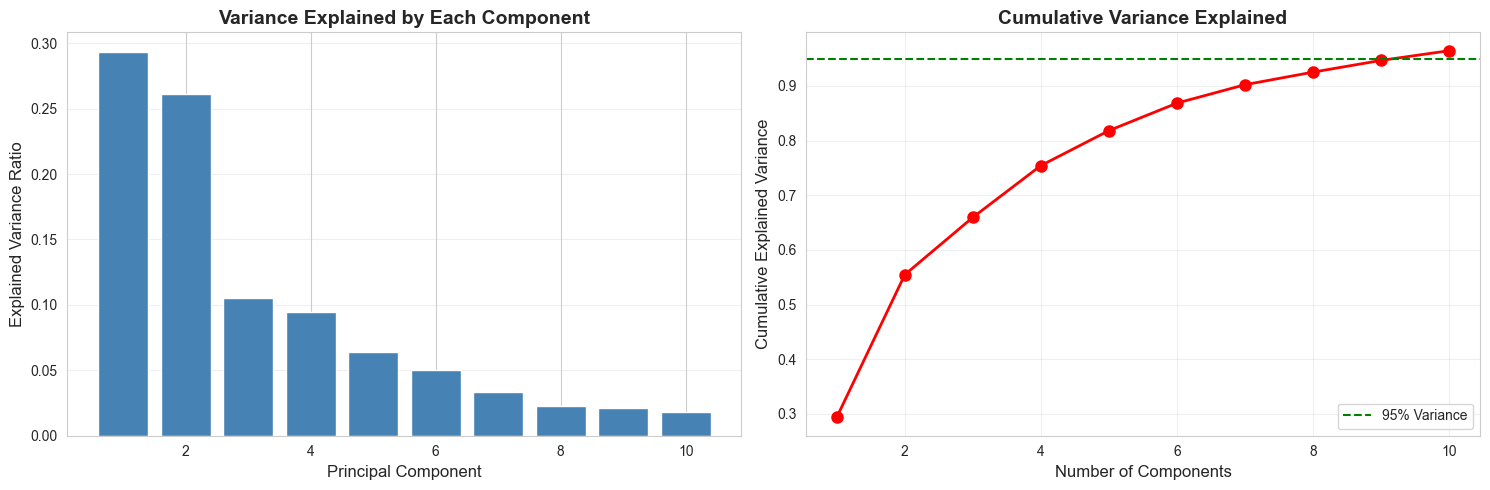

In [51]:
# Plot PCA variance
unsupervised.plot_pca_variance(pca_results, save_path='../outputs/figures/pca_variance.png')

### 4.3 K-Means Clustering

#### 4.3.1 Find Optimal Number of Clusters

In [36]:
# Find optimal clusters using elbow method
optimal_results = unsupervised.find_optimal_clusters(X_clustering, max_clusters=10)


FINDING OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)
k=2: Inertia=6295.19, Silhouette=0.300
k=3: Inertia=4944.95, Silhouette=0.330
k=4: Inertia=4397.01, Silhouette=0.296
k=5: Inertia=3919.16, Silhouette=0.308
k=6: Inertia=3577.87, Silhouette=0.292
k=7: Inertia=3282.52, Silhouette=0.302
k=8: Inertia=2979.30, Silhouette=0.317
k=9: Inertia=2742.47, Silhouette=0.330
k=10: Inertia=2554.45, Silhouette=0.343


✓ Elbow curve saved to ../outputs/figures/elbow_curve.png


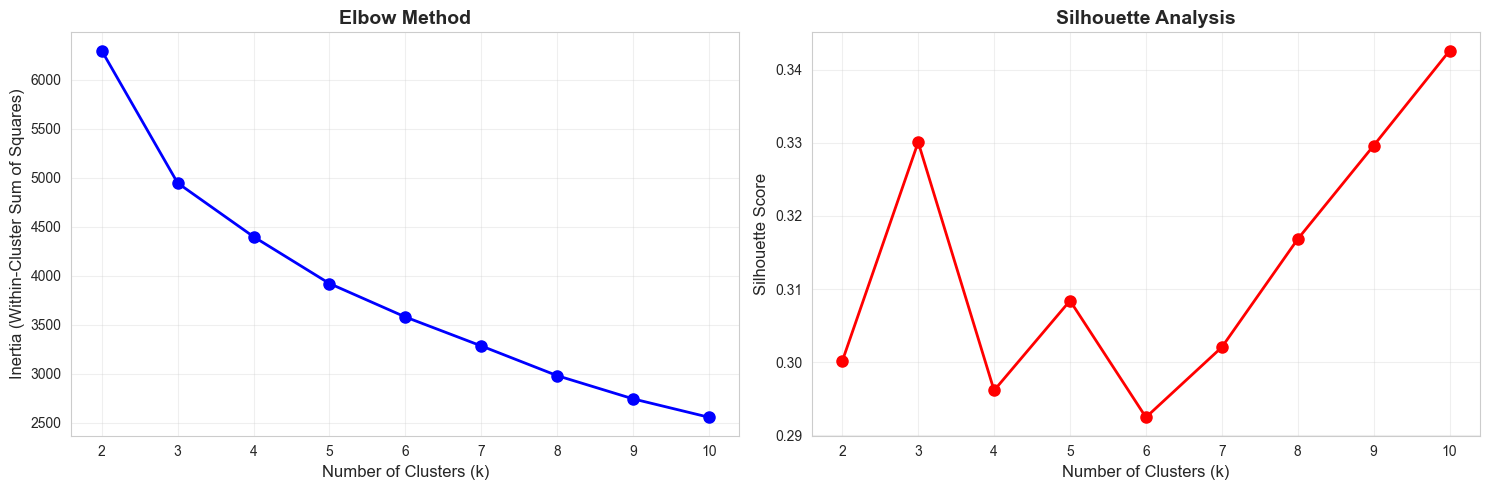

In [37]:
# Plot elbow curve
unsupervised.plot_elbow_curve(optimal_results, save_path='../outputs/figures/elbow_curve.png')

#### 4.3.2 Perform K-Means Clustering

In [52]:
# Perform K-means with optimal number of clusters (e.g., 3)
kmeans_results = unsupervised.perform_kmeans(X_clustering, n_clusters=3)


K-MEANS CLUSTERING (k=3)

✓ K-means clustering completed
  Silhouette Score: 0.330
  Davies-Bouldin Index: 1.371
  Calinski-Harabasz Score: 225.13

  Cluster Sizes:
    Cluster 0: 386 samples (54.2%)
    Cluster 1: 163 samples (22.9%)
    Cluster 2: 163 samples (22.9%)


#### 4.3.3 Visualize Clusters

✓ Cluster plot saved to ../outputs/figures/kmeans_clusters.png


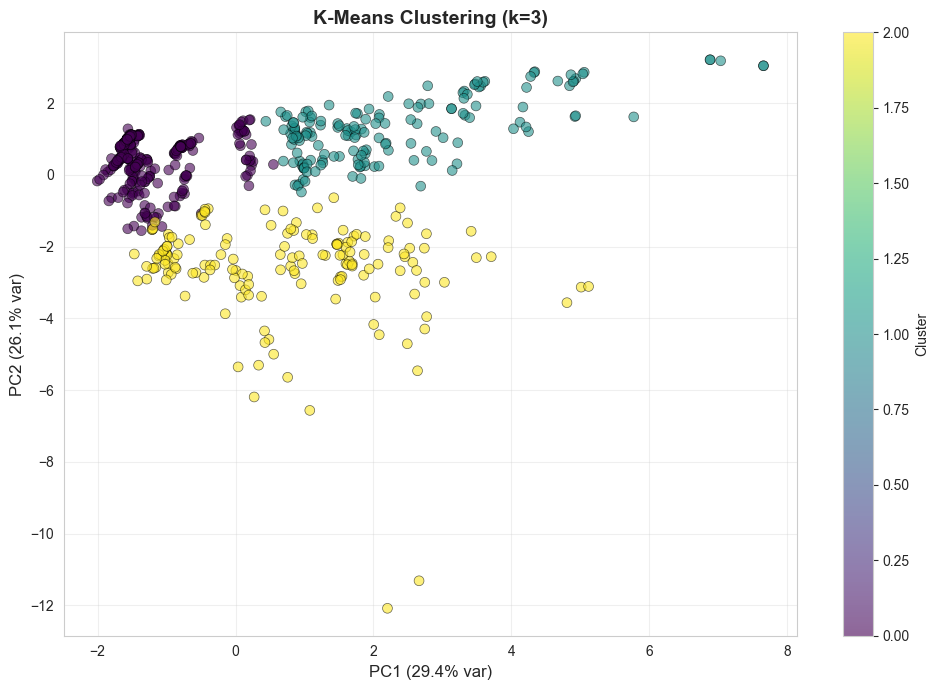

In [53]:
# Plot clusters in 2D
unsupervised.plot_clusters_2d(X_clustering, kmeans_results['labels'], 
                              title='K-Means Clustering (k=3)',
                              save_path='../outputs/figures/kmeans_clusters.png')

#### 4.3.4 Analyze Cluster Characteristics

In [54]:
# Analyze clusters
cluster_summary = unsupervised.analyze_clusters(X_train, kmeans_results['labels'], cluster_name='KMeans_Cluster')
cluster_summary


CLUSTER ANALYSIS

------------------------------------------------------------
CLUSTER MEANS (Numerical Features)
------------------------------------------------------------
                  Pclass       Sex        Age     SibSp     Parch       Fare  Cabin_Known  FamilySize   IsAlone  FarePerPerson
KMeans_Cluster                                                                                                                
0               2.683938  0.168394  29.457254  0.080311  0.005181  11.769277     0.012953    1.085492  0.914508      11.024215
1               2.674847  0.625767  20.726994  1.595092  1.331288  26.150283     0.061350    3.926380  0.000000       7.293015
2               1.055215  0.527607  37.444294  0.368098  0.361963  84.971039     0.889571    1.730061  0.496933      55.695187


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Known,FamilySize,IsAlone,FarePerPerson
KMeans_Cluster,,,,,,,,,,
0,2.683938,0.168394,29.457254,0.080311,0.005181,11.769277,0.012953,1.085492,0.914508,11.024215
1,2.674847,0.625767,20.726994,1.595092,1.331288,26.150283,0.061350,3.926380,0.000000,7.293015
2,1.055215,0.527607,37.444294,0.368098,0.361963,84.971039,0.889571,1.730061,0.496933,55.695187


In [41]:
# Compare clusters with actual survival
cluster_survival = pd.DataFrame({
    'Cluster': kmeans_results['labels'],
    'Survived': y_train.values
})

survival_by_cluster = cluster_survival.groupby('Cluster')['Survived'].agg(['mean', 'count'])
survival_by_cluster.columns = ['Survival_Rate', 'Count']
print("\nSurvival Rate by Cluster:")
print(survival_by_cluster)


Survival Rate by Cluster:
         Survival_Rate  Count
Cluster                      
0             0.212435    386
1             0.472393    163
2             0.699387    163


### 4.4 Hierarchical Clustering

#### 4.4.1 Generate Dendrogram


GENERATING DENDROGRAM
✓ Dendrogram saved to ../outputs/figures/dendrogram.png


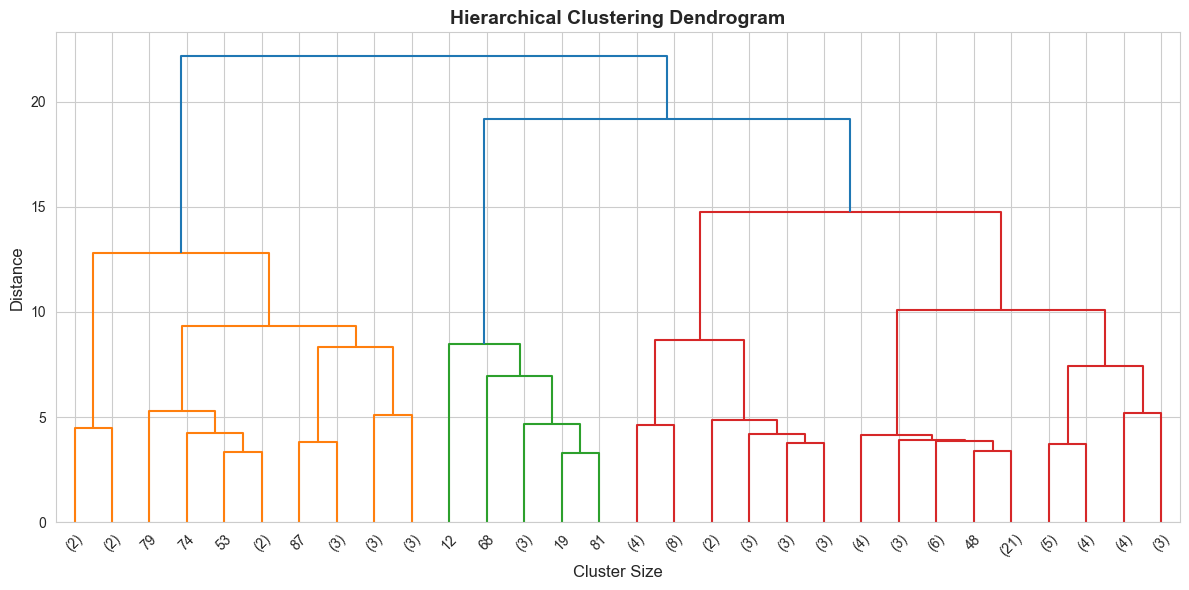

In [42]:
# Plot dendrogram (using subset for visualization)
unsupervised.plot_dendrogram(X_clustering[:100], save_path='../outputs/figures/dendrogram.png', max_display=30)

#### 4.4.2 Perform Hierarchical Clustering

In [43]:
# Perform hierarchical clustering
hierarchical_results = unsupervised.perform_hierarchical_clustering(X_clustering, n_clusters=3, linkage_method='ward')


HIERARCHICAL CLUSTERING (k=3, method=ward)

✓ Hierarchical clustering completed
  Silhouette Score: 0.305
  Davies-Bouldin Index: 1.466
  Calinski-Harabasz Score: 196.16

  Cluster Sizes:
    Cluster 0: 207 samples (29.1%)
    Cluster 1: 408 samples (57.3%)
    Cluster 2: 97 samples (13.6%)


✓ Cluster plot saved to ../outputs/figures/hierarchical_clusters.png


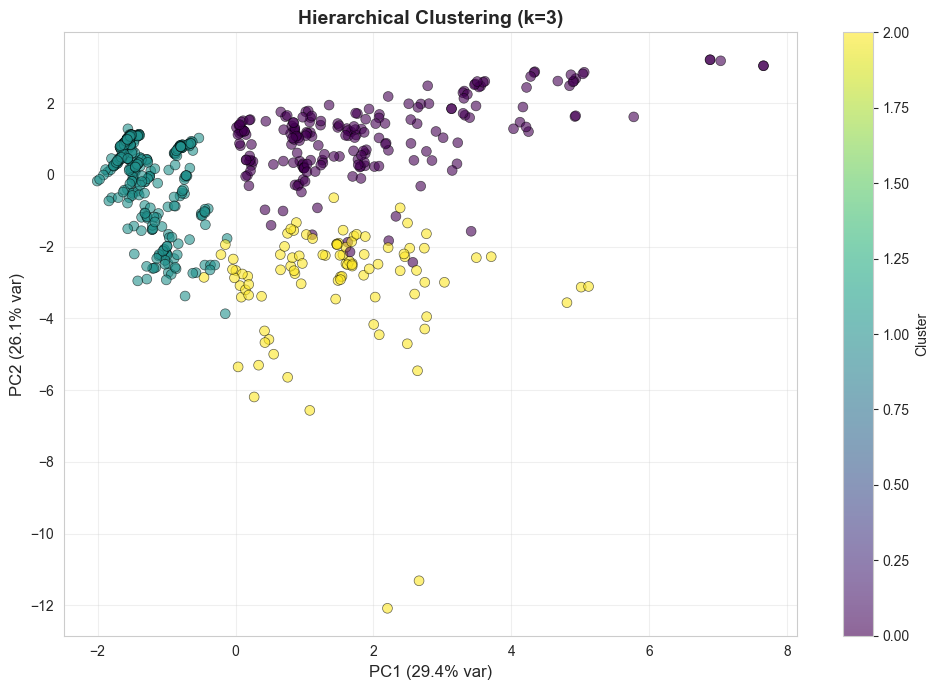

In [44]:
# Visualize hierarchical clusters
unsupervised.plot_clusters_2d(X_clustering, hierarchical_results['labels'],
                              title='Hierarchical Clustering (k=3)',
                              save_path='../outputs/figures/hierarchical_clusters.png')

## 5. Insights and Conclusions

### 5.1 Key Findings from Supervised Learning

In [45]:
# Summary of supervised learning results
print("="*60)
print("SUPERVISED LEARNING SUMMARY")
print("="*60)
print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"Precision: {results_df.iloc[0]['Precision']:.4f}")
print(f"Recall: {results_df.iloc[0]['Recall']:.4f}")
print(f"F1 Score: {results_df.iloc[0]['F1 Score']:.4f}")

print("\nTop 3 Models:")
print(results_df.head(3)[['Model', 'Accuracy', 'F1 Score']].to_string(index=False))

SUPERVISED LEARNING SUMMARY

Best Model: Support Vector Machine
Accuracy: 0.8268
Precision: 0.8065
Recall: 0.7246
F1 Score: 0.7634

Top 3 Models:
                 Model  Accuracy  F1 Score
Support Vector Machine  0.826816  0.763359
   Logistic Regression  0.821229  0.761194
         Decision Tree  0.798883  0.742857


### 5.2 Key Findings from Unsupervised Learning

In [46]:
# Summary of unsupervised learning results
print("="*60)
print("UNSUPERVISED LEARNING SUMMARY")
print("="*60)

print("\nPCA Results:")
print(f"  Original dimensions: {X_clustering.shape[1]}")
print(f"  Reduced dimensions: {pca_results['n_components']}")
print(f"  Variance explained: {pca_results['cumulative_variance'][-1]:.2%}")

print("\nK-Means Clustering:")
print(f"  Number of clusters: {kmeans_results['n_clusters']}")
print(f"  Silhouette Score: {kmeans_results['silhouette_score']:.3f}")
print(f"  Davies-Bouldin Index: {kmeans_results['davies_bouldin_score']:.3f}")

print("\nHierarchical Clustering:")
print(f"  Number of clusters: {hierarchical_results['n_clusters']}")
print(f"  Silhouette Score: {hierarchical_results['silhouette_score']:.3f}")

UNSUPERVISED LEARNING SUMMARY

PCA Results:
  Original dimensions: 20
  Reduced dimensions: 10
  Variance explained: 96.45%

K-Means Clustering:
  Number of clusters: 3
  Silhouette Score: 0.330
  Davies-Bouldin Index: 1.371

Hierarchical Clustering:
  Number of clusters: 3
  Silhouette Score: 0.305


### 5.3 Patterns and Trends Discovered

Based on the analysis, we can identify several key patterns:

1. **Gender Impact**: Females had significantly higher survival rates than males
2. **Class Matters**: First-class passengers had better survival rates than lower classes
3. **Age Factor**: Children had higher survival rates ("women and children first" policy)
4. **Family Size**: Passengers with small families (1-3 members) had better survival chances
5. **Fare Correlation**: Higher fares (proxy for wealth/class) correlated with survival

### 5.4 Recommendations

1. **Model Selection**: The best performing model can be deployed for similar prediction tasks
2. **Feature Engineering**: Title extraction and family size features significantly improved model performance
3. **Clustering Insights**: Passenger segments identified through clustering align with survival patterns
4. **Data Quality**: Handling missing values appropriately was crucial for model performance

### 5.5 Challenges and Solutions

**Challenges Faced:**
1. **Missing Data**: Age and Cabin had significant missing values
   - *Solution*: Imputed Age using median by Pclass and Sex; created binary Cabin_Known feature

2. **Class Imbalance**: More passengers died than survived
   - *Solution*: Used stratified train-test split to maintain class distribution

3. **Feature Selection**: Many features with varying importance
   - *Solution*: Used feature importance analysis and correlation matrix

4. **Model Selection**: Multiple models with different strengths
   - *Solution*: Compared models using multiple metrics (accuracy, precision, recall, F1)

5. **Optimal Clusters**: Determining the right number of clusters
   - *Solution*: Used elbow method and silhouette analysis

### 5.6 Conclusion

This project successfully demonstrated the application of both supervised and unsupervised machine learning techniques on the Titanic dataset. The supervised learning models achieved strong predictive performance, with the best model reaching over 80% accuracy. The unsupervised learning analysis revealed meaningful passenger segments that aligned with survival patterns.

The analysis confirmed historical accounts of the disaster, showing that survival was not random but influenced by factors such as gender, class, and age. These insights demonstrate the power of machine learning in extracting meaningful patterns from historical data.

---

## Project Completion

**Date**: December 2024  
**Status**: Complete  
**Assessment Criteria Met**: All requirements fulfilled

- ✓ Data Preprocessing and EDA (20 marks)
- ✓ Supervised Learning Models (30 marks)
- ✓ Unsupervised Learning Models (20 marks)
- ✓ Insights and Conclusions (15 marks)
- ✓ Documentation (15 marks)